# 第3章
モデルの精度を上げるために最も重要な要素である特徴量の作成方法について学ぶ。

---
ソースコードは以下から引用しています: https://github.com/ghmagazine/kagglebook/tree/master/ch03

ライセンス: https://github.com/ghmagazine/kagglebook/blob/master/LICENSE

In [1]:
import numpy as np
import pandas as pd

## 数値変数の変換

### データ準備

In [2]:
# train_xは学習データ、train_yは目的変数、test_xはテストデータ
# pandasのDataFrame, Seriesで保持します。（numpyのarrayで保持することもあります）

train = pd.read_csv('data/sample-data/train_preprocessed.csv')
train_x = train.drop(['target'], axis=1)
train_y = train['target']
test_x = pd.read_csv('data/sample-data/test_preprocessed.csv')

# 説明用に学習データとテストデータの元の状態を保存しておく
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()


# 学習データとテストデータを返す関数
def load_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()
    return train_x, test_x


# 変換する数値変数をリストに格納
num_cols = ['age', 'height', 'weight', 'amount',
            'medical_info_a1', 'medical_info_a2', 'medical_info_a3', 'medical_info_b1']

In [3]:
# データの読み込み
train_x, test_x = load_data()
# 元データを保存
origin_train_x = train_x.copy()
origin_test_x  = test_x.copy()

In [4]:
train_x.head()

,age,sex,height,weight,product,amount,medical_info_a1,medical_info_a2,medical_info_a3,medical_info_b1,...,medical_keyword_5,medical_keyword_6,medical_keyword_7,medical_keyword_8,medical_keyword_9,medical_keyword_10,year,month,day,yearmonth
0,50,1,166.445608,65.016732,9,7000000,134,202,1,11,...,0,1,0,1,0,0,2015,2,3,24182
1,68,0,164.334615,56.544217,0,7000000,438,263,3,14,...,0,0,1,1,0,0,2015,5,9,24185
2,77,1,167.462917,54.242267,2,6000000,313,325,1,18,...,0,1,0,1,0,0,2016,2,13,24194
3,17,1,177.097725,71.147762,3,8000000,342,213,2,11,...,0,0,0,1,0,0,2015,7,6,24187
4,62,0,158.165788,65.240697,1,9000000,327,102,0,14,...,0,0,1,1,1,0,2016,9,17,24201


### clipping

In [5]:
less_than_height143 = train_x['height'] < 143
less_than_weight36 = train_x['weight'] < 36

In [6]:
# 列ごとに学習データの1％点、99％点を計算
p01 = train_x[num_cols].quantile(0.01)
p99 = train_x[num_cols].quantile(0.99)

In [7]:
p01

age                   5.000000
height              144.077279
weight               37.841250
amount             1000.000000
medical_info_a1      56.000000
medical_info_a2       5.000000
medical_info_a3       0.000000
medical_info_b1      10.000000
Name: 0.01, dtype: float64

In [8]:
# 1％点以下の値は1％点に、99％点以上の値は99％点にclippingする
train_x[num_cols] = train_x[num_cols].clip(p01, p99, axis=1)
test_x[num_cols] = test_x[num_cols].clip(p01, p99, axis=1)

#### Before

In [9]:
origin_train_x[less_than_height143].head()

,age,sex,height,weight,product,amount,medical_info_a1,medical_info_a2,medical_info_a3,medical_info_b1,...,medical_keyword_5,medical_keyword_6,medical_keyword_7,medical_keyword_8,medical_keyword_9,medical_keyword_10,year,month,day,yearmonth
138,35,0,142.989344,38.839317,8,6000,450,115,0,17,...,0,0,0,1,0,0,2016,11,11,24203
155,71,0,142.382554,36.833885,4,5000000,464,285,2,13,...,0,0,0,1,0,0,2016,8,1,24200
184,63,0,141.456236,46.000785,10,8000,197,463,2,14,...,0,1,0,1,1,0,2015,5,1,24185
445,18,0,142.733805,47.272936,0,5000000,461,261,4,15,...,0,0,0,1,0,0,2016,7,17,24199
836,43,0,137.529007,46.963333,8,7000,330,239,1,16,...,0,0,0,1,0,0,2015,12,1,24192


In [10]:
origin_train_x[less_than_weight36].head()

,age,sex,height,weight,product,amount,medical_info_a1,medical_info_a2,medical_info_a3,medical_info_b1,...,medical_keyword_5,medical_keyword_6,medical_keyword_7,medical_keyword_8,medical_keyword_9,medical_keyword_10,year,month,day,yearmonth
281,39,1,157.153144,31.167427,5,8000000,324,237,1,12,...,0,1,0,1,0,0,2015,10,5,24190
368,58,0,153.159891,35.492212,8,5000,343,357,3,19,...,0,0,0,1,0,0,2015,5,27,24185
410,45,0,158.512325,34.598238,6,8000,231,399,6,16,...,0,1,0,1,0,0,2015,5,11,24185
497,28,0,152.065204,30.796906,7,5000,275,297,1,17,...,0,0,0,1,0,0,2015,12,8,24192
596,76,0,158.711798,32.400449,9,4000000,387,360,2,14,...,0,0,0,1,0,0,2016,5,16,24197


#### After

In [11]:
train_x[less_than_height143].head()

,age,sex,height,weight,product,amount,medical_info_a1,medical_info_a2,medical_info_a3,medical_info_b1,...,medical_keyword_5,medical_keyword_6,medical_keyword_7,medical_keyword_8,medical_keyword_9,medical_keyword_10,year,month,day,yearmonth
138,35,0,144.077279,38.839317,8,6000,450.0,115.0,0,17,...,0,0,0,1,0,0,2016,11,11,24203
155,71,0,144.077279,37.841250,4,5000000,464.0,285.0,2,13,...,0,0,0,1,0,0,2016,8,1,24200
184,63,0,144.077279,46.000785,10,8000,197.0,463.0,2,14,...,0,1,0,1,1,0,2015,5,1,24185
445,18,0,144.077279,47.272936,0,5000000,461.0,261.0,4,15,...,0,0,0,1,0,0,2016,7,17,24199
836,43,0,144.077279,46.963333,8,7000,330.0,239.0,1,16,...,0,0,0,1,0,0,2015,12,1,24192


In [12]:
train_x[less_than_weight36].head()

,age,sex,height,weight,product,amount,medical_info_a1,medical_info_a2,medical_info_a3,medical_info_b1,...,medical_keyword_5,medical_keyword_6,medical_keyword_7,medical_keyword_8,medical_keyword_9,medical_keyword_10,year,month,day,yearmonth
281,39,1,157.153144,37.84125,5,8000000,324.0,237.0,1,12,...,0,1,0,1,0,0,2015,10,5,24190
368,58,0,153.159891,37.84125,8,5000,343.0,357.0,3,19,...,0,0,0,1,0,0,2015,5,27,24185
410,45,0,158.512325,37.84125,6,8000,231.0,399.0,6,16,...,0,1,0,1,0,0,2015,5,11,24185
497,28,0,152.065204,37.84125,7,5000,275.0,297.0,1,17,...,0,0,0,1,0,0,2015,12,8,24192
596,76,0,158.711798,37.84125,9,4000000,387.0,360.0,2,14,...,0,0,0,1,0,0,2016,5,16,24197


→height143未満やweight36未満のレコードはそれぞれ1%点の値に置き換えられた

### RankGauss

In [13]:
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# データの読み込み
train_x, test_x = load_data()

In [15]:
pd.set_option('display.max_columns', 30)
train_x.describe()

,age,sex,height,weight,product,amount,medical_info_a1,medical_info_a2,medical_info_a3,medical_info_b1,medical_info_b2,medical_info_b3,medical_info_c1,medical_info_c2,medical_keyword_1,medical_keyword_2,medical_keyword_3,medical_keyword_4,medical_keyword_5,medical_keyword_6,medical_keyword_7,medical_keyword_8,medical_keyword_9,medical_keyword_10,year,month,day,yearmonth
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,7030.000000,1998.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,42.026500,0.602300,165.892951,60.857049,4.062800,3.840844e+06,299.101200,249.454700,1.98780,14.419200,0.805300,8.079200,1.478094,15.009868,0.802100,0.504200,0.202800,0.04950,0.019100,0.397800,0.098700,0.799000,0.304000,0.050500,2015.504900,6.509400,15.73810,24192.568200
std,21.676005,0.489447,9.408643,10.718324,3.424679,3.459440e+06,104.496256,103.715567,1.41741,2.871462,0.934387,4.886954,1.208174,3.993744,0.398436,0.500007,0.402105,0.21692,0.136883,0.489468,0.298274,0.400768,0.460006,0.218985,0.500001,3.478523,8.79102,6.923839
min,5.000000,0.000000,131.619709,28.282276,0.000000,1.000000e+03,-62.000000,-137.000000,0.00000,10.000000,0.000000,0.000000,0.000000,8.011711,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.00000,24181.000000
25%,23.000000,0.000000,159.549826,53.363119,1.000000,9.000000e+03,227.000000,180.000000,1.00000,12.000000,0.000000,4.000000,1.000000,11.617184,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2015.000000,3.000000,8.00000,24187.000000
50%,43.000000,1.000000,166.084344,60.520498,3.000000,3.000000e+06,299.500000,250.000000,2.00000,14.000000,1.000000,8.000000,1.000000,14.942567,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2016.000000,7.000000,16.00000,24193.000000
75%,61.000000,1.000000,172.422230,67.812917,8.000000,7.000000e+06,371.000000,320.000000,3.00000,17.000000,2.000000,12.000000,2.000000,18.428343,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2016.000000,10.000000,23.00000,24199.000000
max,79.000000,1.000000,197.007690,113.917920,10.000000,1.000000e+07,706.000000,656.000000,9.00000,19.000000,3.000000,16.000000,9.000000,21.994451,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,12.000000,31.00000,24204.000000


In [16]:
# 学習データに基づいて複数列のRankGaussによる変換を定義
transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
transformer.fit(train_x[num_cols])

QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=100,
                    output_distribution='normal', random_state=0,
                    subsample=100000)

In [17]:
# 変換後のデータで各列を置換
train_x[num_cols] = transformer.transform(train_x[num_cols])

#### Before

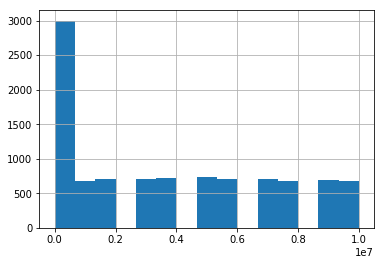

In [18]:
origin_train_x['amount'].hist(bins=15)

#### After

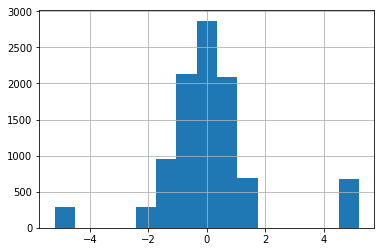

In [19]:
train_x['amount'].hist(bins=15)

## 時系列データの扱い

### ラグ特徴量

In [20]:
# ワイドフォーマットのデータを読み込む
df_wide = pd.read_csv('data/ch03/time_series_wide.csv', index_col=0)
# インデックスの型を日付型に変更する
df_wide.index = pd.to_datetime(df_wide.index)

In [21]:
df_wide.head()

,A,B,C
2016-07-01,532,3314,1136
2016-07-02,798,2461,1188
2016-07-03,823,3522,1711
2016-07-04,937,5451,1977
2016-07-05,881,4729,1975


このようなデータでは、予測対象の値に対して自身の過去の値、特に直近の値が大きな影響を及ぼす

In [22]:
# ワイドフォーマットのデータをセットする
# インデックスが日付などの時間、列がユーザや店舗などで、値が売上などの注目する変数を表すものとする
x = df_wide

#### 単純なラグ特徴量

In [23]:
# 1期前のlagを取得
x_lag1 = x.shift(1)
x_lag1.head()

,A,B,C
2016-07-01,NaN,NaN,NaN
2016-07-02,532.0,3314.0,1136.0
2016-07-03,798.0,2461.0,1188.0
2016-07-04,823.0,3522.0,1711.0
2016-07-05,937.0,5451.0,1977.0


In [24]:
# 7期前のlagを取得
x_lag7 = x.shift(7)
x_lag7.head(10)

,A,B,C
2016-07-01,NaN,NaN,NaN
2016-07-02,NaN,NaN,NaN
2016-07-03,NaN,NaN,NaN
2016-07-04,NaN,NaN,NaN
2016-07-05,NaN,NaN,NaN
2016-07-06,NaN,NaN,NaN
2016-07-07,NaN,NaN,NaN
2016-07-08,532.0,3314.0,1136.0
2016-07-09,798.0,2461.0,1188.0
2016-07-10,823.0,3522.0,1711.0


#### 移動平均やその他のラグ特徴量

単純にシフトさせるだけではなく、移動平均、つまりシフトさせて一定期間の平均をとった値をとる

In [25]:
# 1期前から3期間の移動平均を算出
x_avg3 = x.shift(1).rolling(window=3).mean()
x_avg3.head()

,A,B,C
2016-07-01,NaN,NaN,NaN
2016-07-02,NaN,NaN,NaN
2016-07-03,NaN,NaN,NaN
2016-07-04,717.666667,3099.000000,1345.000000
2016-07-05,852.666667,3811.333333,1625.333333


## 次元削減・教師なし学習による特徴量

### データ準備

In [26]:
# train_xは学習データ、train_yは目的変数、test_xはテストデータ
# pandasのDataFrame, Seriesで保持します。（numpyのarrayで保持することもあります）

train = pd.read_csv('data/sample-data/train_preprocessed_onehot.csv')
train_x = train.drop(['target'], axis=1)
train_y = train['target']
test_x = pd.read_csv('data/sample-data/test_preprocessed_onehot.csv')

# 説明用に学習データとテストデータの元の状態を保存しておく
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 標準化を行った学習データとテストデータを返す関数
def load_standarized_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    scaler = StandardScaler()
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    return pd.DataFrame(train_x), pd.DataFrame(test_x)


# MinMaxスケーリングを行った学習データとテストデータを返す関数
def load_minmax_scaled_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()

    # Min-Max Scalingを行う
    scaler = MinMaxScaler()
    scaler.fit(pd.concat([train_x, test_x], axis=0))
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)

    return pd.DataFrame(train_x), pd.DataFrame(test_x)

In [27]:
train_x.head()

,age,sex,height,weight,product_0,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,...,medical_keyword_2,medical_keyword_3,medical_keyword_4,medical_keyword_5,medical_keyword_6,medical_keyword_7,medical_keyword_8,medical_keyword_9,medical_keyword_10,year,month,day,yearmonth,medical_info_c1_nan,medical_info_c2_nan
0,50,1,166.445608,65.016732,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,2015,2,3,24182,False,True
1,68,0,164.334615,56.544217,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,2015,5,9,24185,True,True
2,77,1,167.462917,54.242267,0,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,2016,2,13,24194,False,True
3,17,1,177.097725,71.147762,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2015,7,6,24187,False,False
4,62,0,158.165788,65.240697,0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,1,0,2016,9,17,24201,False,True


### PCA

In [28]:
# 標準化されたデータを用いる
train_x, test_x = load_standarized_data()

# PCA
from sklearn.decomposition import PCA

# データは標準化などのスケールを揃える前処理が行われているものとする

# 学習データに基づいてPCAによる変換を定義
pca = PCA(n_components=5)
pca.fit(train_x)

# 変換の適用
train_x = pca.transform(train_x)
train_x

array([[ 2.05144095, -0.40689016, -1.15864712,  1.31204881,  2.1395601 ],
       [ 0.80414197, -1.37983478, -1.06083168,  1.67014789, -1.8545338 ],
       [-0.10808793,  0.1918998 , -1.04793655,  0.86760852,  1.17502821],
       ...,
       [-1.8268236 , -1.93393592,  1.93069958,  1.72362959, -1.11046705],
       [-0.78927704, -0.63196929,  1.78966727, -1.06889634, -0.18373061],
       [ 2.1258417 ,  0.96511688,  0.58247985, -1.20595284,  0.66585764]])

In [29]:
# Before
train_x_saved.shape

(10000, 59)

In [30]:
# After
train_x.shape

(10000, 5)

### NMF

In [31]:
# 非負の値とするため、MinMaxスケーリングを行ったデータを用いる
train_x, test_x = load_minmax_scaled_data()

from sklearn.decomposition import NMF

# データは非負の値から構成されているとする

# 学習データに基づいてNMFによる変換を定義
model = NMF(n_components=5, init='random', random_state=71)
model.fit(train_x)

# 変換の適用
train_x = model.transform(train_x)

In [32]:
train_x

array([[0.75986403, 0.        , 0.02349616, 0.        , 0.        ],
       [0.71034016, 0.01535425, 0.        , 0.00825695, 0.02167209],
       [0.66389753, 0.64093764, 0.14205363, 0.        , 0.44550723],
       ...,
       [0.67802549, 0.01105262, 0.        , 0.01086126, 0.50310889],
       [0.        , 0.01051369, 0.4818196 , 0.30903171, 0.48223883],
       [0.01433202, 0.62219057, 0.48536788, 0.        , 0.00637701]])

In [33]:
train_x.shape

(10000, 5)

### LatentDirichletAllocation
処理にやや時間が掛かる

In [34]:
# MinMaxスケーリングを行ったデータを用いる
# カウント行列ではないが、非負の値であれば計算は可能
train_x, test_x = load_minmax_scaled_data()

from sklearn.decomposition import LatentDirichletAllocation

# データは単語文書のカウント行列などとする

# 学習データに基づいてLDAによる変換を定義
model = LatentDirichletAllocation(n_components=5, random_state=71)
model.fit(train_x)

# 変換の適用
train_x = model.transform(train_x)
train_x

array([[0.01574744, 0.0157792 , 0.93683928, 0.01593487, 0.01569921],
       [0.33338023, 0.62220041, 0.01477796, 0.01484837, 0.01479303],
       [0.68220031, 0.01120325, 0.01118684, 0.284196  , 0.01121359],
       ...,
       [0.3701719 , 0.01403994, 0.01406191, 0.5875934 , 0.01413285],
       [0.01317215, 0.17923686, 0.46731043, 0.32705925, 0.01322131],
       [0.01455362, 0.01459521, 0.43380725, 0.01464105, 0.52240287]])

In [35]:
train_x.shape

(10000, 5)

### UMAP

In [36]:
# 標準化されたデータを用いる
train_x, test_x = load_standarized_data()

import umap

# データは標準化などのスケールを揃える前処理が行われているものとする

# 学習データに基づいてUMAPによる変換を定義
um = umap.UMAP()
um.fit(train_x)

# 変換の適用
train_x = um.transform(train_x)

/root/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [37]:
train_x

array([[  7.7616706 , -12.53473   ],
       [ -1.124536  ,   0.67753685],
       [ 12.597182  ,  -5.5199714 ],
       ...,
       [ -4.10443   , -11.099414  ],
       [ -1.1456162 ,  17.031994  ],
       [-15.605395  ,  -2.3586292 ]], dtype=float32)

In [38]:
train_x.shape

(10000, 2)

### クラスタリング

分類されたクラスやクラスタ中心からの距離などを特徴量として使える

In [39]:
# 標準化されたデータを用いる
train_x, test_x = load_standarized_data()

from sklearn.cluster import MiniBatchKMeans

# データは標準化などのスケールを揃える前処理が行われているものとする

# 学習データに基づいてMini-Batch K-Meansによる変換を定義
kmeans = MiniBatchKMeans(n_clusters=10, random_state=71)
kmeans.fit(train_x)

# 属するクラスタを出力する
train_clusters = kmeans.predict(train_x)

# 各クラスタの中心までの距離を出力する
train_distances = kmeans.transform(train_x)

In [40]:
train_clusters.shape

(10000,)

In [41]:
train_distances.shape

(10000, 10)